In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# plot style
sns.set_style('whitegrid')
sns.set_style({'font.family': 'Times New Roman'})

In [2]:
%matplotlib inline  

In [11]:
df = pd.read_csv("data-policy-results.csv", sep='\t')

In [12]:
df.head()

,No,Name,Policy type,5 years ago,Sharing mode,Adopt AEA
0,1,"The Quarterly Journal of Economics, Oxford Uni...",Require,No,Data repository,Yes
1,2,"American Economic Review, American Economic As...",Require,Yes,Data repository,Yes
2,3,"Journal of Political Economy, University of Ch...",Require,Yes,Journal website,Yes
3,4,"Econometrica, Econometric Society",Require,Yes,Journal website,No
4,5,"Journal of Financial Economics, Elsevier",Recommend,NaN,Journal website,No


In [13]:
len(df)

30

In [14]:
# Pie chart
a = df['Policy type'].value_counts()
labels = a.index
sizes = a
#colors
colors1 = plt.cm.Set2(np.linspace(0,1,3))

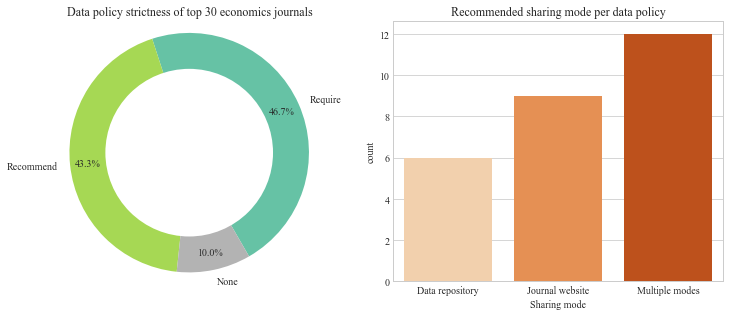

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.5))

axes[0].pie(sizes, colors = colors1, labels=labels, autopct='%1.1f%%', startangle=300, pctdistance=0.85)
axes[0].add_patch(plt.Circle((0,0),0.70,fc='white')) 
axes[0].axis('equal') 
axes[0].set_title("Data policy strictness of top 30 economics journals")
sns.countplot(x='Sharing mode', data=df, palette='Oranges', ax=axes[1])
axes[1].set_title("Recommended sharing mode per data policy")
plt.tight_layout()
plt.savefig('img/a.png', dpi=100)

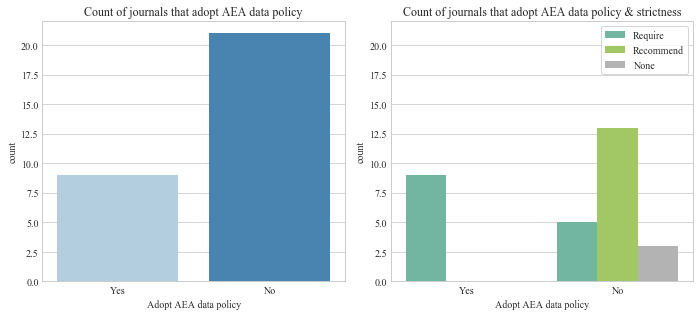

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.5))
sns.countplot(x='Adopt AEA', data=df, palette="Blues", ax=axes[0])
axes[0].set_title("Count of journals that adopt AEA data policy")
axes[0].set_xlabel("Adopt AEA data policy")
axes[0].set(ylim=(0, 22))
sns.countplot(x='Adopt AEA', hue='Policy type', data=df, palette=colors1, ax=axes[1])
axes[1].set_title("Count of journals that adopt AEA data policy & strictness")
axes[1].set_xlabel("Adopt AEA data policy")
axes[1].set(ylim=(0, 22))
#plt.legend(loc=1)
legend = plt.legend(frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('white')
#frame.set_edgecolor('gray')
plt.tight_layout()
plt.savefig('img/b.png', dpi=100)

In [418]:
df = pd.read_csv("econ.csv")

In [419]:
a = df.sum()

In [420]:
df1 = a[['stata', 'julia', 'python','R','C','C++','matlab','fortran','sas']]
df1.values

array([673, 1, 7, 22, 15, 3, 245, 28, 52], dtype=object)

In [421]:
from __future__ import division
pom = (df1.values * 100 / df1.values.sum())

In [422]:
l = pd.Series(pom, index=df1.index)
u = l.sort_values(ascending=False)
u

stata        64.3403
matlab       23.4226
sas          4.97132
fortran      2.67686
R            2.10325
C            1.43403
python      0.669216
C++         0.286807
julia      0.0956023
dtype: object

In [423]:
s = df[['stata', 'julia', 'python','R','C','C++','matlab','fortran','sas']]
no_sw = s.sum(axis=1).astype(int).value_counts(sort=False)
no_sw

0    590
1    710
2    154
3      4
4      4
dtype: int64

In [424]:
tot=len(s)
no_ = no_sw.values*100/tot
no_ = pd.Series(no_, index=no_sw.index)
no_

0    40.355677
1    48.563611
2    10.533516
3     0.273598
4     0.273598
dtype: float64

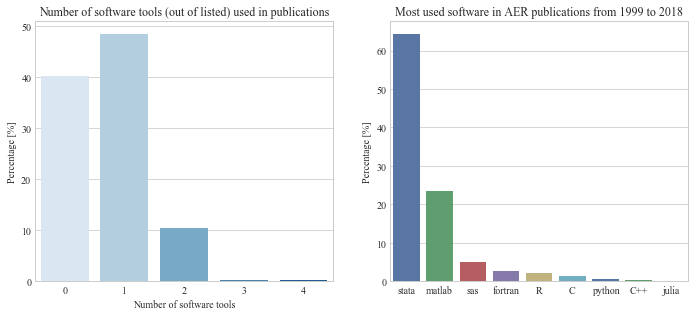

In [425]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.5))
sns.barplot(x=no_.index, y=no_.values, palette="Blues", ax=axes[0])
axes[0].set_ylabel("Percentage [%]")
axes[0].set_xlabel("Number of software tools")
axes[0].set_title("Number of software tools (out of listed) used in publications")

sns.barplot(x=u.index, y=u.values, palette="deep", ax=axes[1])
axes[1].set_ylabel("Percentage [%]")
axes[1].set_title("Most used software in AER publications from 1999 to 2018")

plt.tight_layout()
plt.savefig('img/c.png', dpi=100)